In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 고객 1명당 주문 횟수 분석

In [2]:
orders = pd.read_csv('./datas/orders.csv')
orders.head(20)

FileNotFoundError: [Errno 2] No such file or directory: './datas/orders.csv'

In [ ]:
users = orders[orders['eval_set'] == 'prior']
users['days_since_prior_order'].dropna()

users = users.groupby('user_id').agg(user_orders= ('order_number' , max))
users.head()

In [ ]:
histplot = sns.histplot(users)
plt.show()

In [ ]:
len(users.loc[(users['user_orders'] == 4)]) # 99++

### 4번은 0~4번 구매 고객으로 판단 99는 99번 구매 이상으로 판단 
### 대부분 고객이 0~20번 구매를 하였다.

# 2. 요일 별 구매 수량 분석

In [ ]:
sns.countplot(orders['order_dow'])

### 0번쨰요일과 1번째 요일이 가장 주문량이 많았다. 저 요일이 무슨 요일일지 모르겠지만 아마도 토요일, 일요일 주말로 추측된다.

# 3. 재구매 기간 분석

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(orders['days_since_prior_order'])
plt.show()

### 대부분 일주일 이내에 재구매를 하고, 30일 컬럼이 매우 높은걸로 봐 30일은 30일 이상이라도 판단 됨.

# 4. 1번 구매 시 몇개의 상품이 장바구니에 담기는지 분석

In [ ]:
plt.figure(figsize = (10,5))
order_products__prior = pd.read_csv('./datas/order_products__prior.csv')
sns.histplot(order_products__prior['add_to_cart_order'], binwidth=2, bins=100000)
print(order_products__prior['add_to_cart_order'].max())

### 대부분 1~10개의 상품이 한번 구매 시 장바구니에 담기고, 놀랍게도 145개의 상품을 장바구니에 담아 주문하는 경우도 있었다.

# 5. 가장 많이 구매한 상품은 무엇인가? 분석

In [ ]:
product_count = order_products__prior.groupby('product_id').agg(user_orders= ('product_id' , 'count'))
product_count = product_count.sort_values(by=['user_orders'], ascending = False)

product = pd.read_csv('./datas/products.csv')
product_count = product_count.iloc[0:10]
product_count

In [ ]:
items = []
for idx, row in product_count.iterrows():
    items.append(product.iloc[idx-1][1])
items

In [ ]:
product_count['items'] = items
product_count

In [ ]:
plt.figure(figsize = (10,5))
plt.bar(product_count['items'], product_count['user_orders'])
plt.xticks(rotation=70)
plt.show()

### 바나나, 딸기, 시금치, 아보카도, 레몬, 딸기 등등 유기농 과일 & 채소의 주문량이 매우 많았다.

# 6. 그렇다면 진열대 (aisles) 별로도 구매 차이가 날까? 분석

In [3]:
#이후 분석은 통합 csv로 작업해보겠습니다.

order_new = pd.read_csv('./datas/order_merged_info_new.csv')
order_new.head()


,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,12431417,1,112108,train,4,4,10,9,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce
1,17907723,1,112108,train,4,4,10,9,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
2,13773695,1,112108,train,4,4,10,9,47209,7,0,Organic Hass Avocado,24,4,fresh fruits,produce
3,3586376,1,112108,train,4,4,10,9,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs
4,7492435,1,112108,train,4,4,10,9,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs


/Users/carly/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'produce'),
  Text(1, 0, 'dairy eggs'),
  Text(2, 0, 'snacks'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'frozen'),
  Text(5, 0, 'pantry'),
  Text(6, 0, 'bakery'),
  Text(7, 0, 'canned goods'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'household'),
  Text(11, 0, 'meat seafood'),
  Text(12, 0, 'breakfast'),
  Text(13, 0, 'personal care'),
  Text(14, 0, 'babies'),
  Text(15, 0, 'international'),
  Text(16, 0, 'alcohol'),
  Text(17, 0, 'pets'),
  Text(18, 0, 'missing'),
  Text(19, 0, 'other'),
  Text(20, 0, 'bulk')])

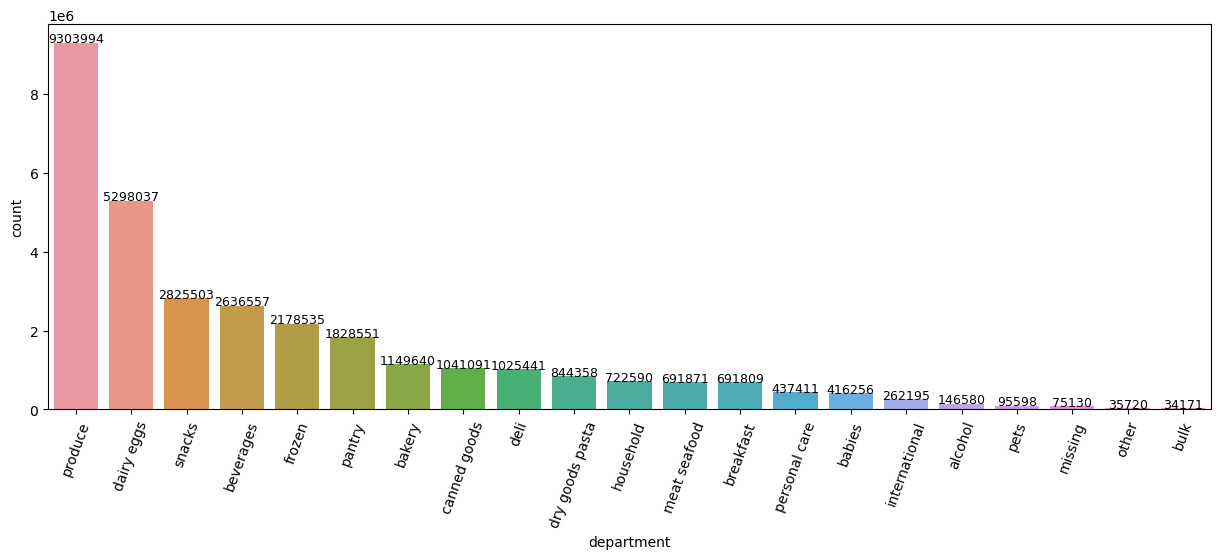

In [18]:
plt.figure(figsize = (15,5))
plot = sns.countplot(order_new['department'], order = order_new['department'].value_counts().index)

for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)

plt.xticks(rotation=70)